In [1]:
#yuz tanima islemini soyle ozetleyebiliriz;
#gozleri yatay cizgi burnu dikey bir cizgi agzi da uzun bir yatay cizgi olarak tespit edebiliriz.
#bunun icin hazir olarak haarcascade ile hazir modeller var istersek oradan istedigimizi indirebiliriz.
#birden fazla cesit modeller var, on yuz full body gibi. ama kendi tanima algoritmamizi da ilerde yapicaz.

In [2]:
import cv2
import matplotlib.pyplot as plt

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 629.5, 816.5, -0.5))

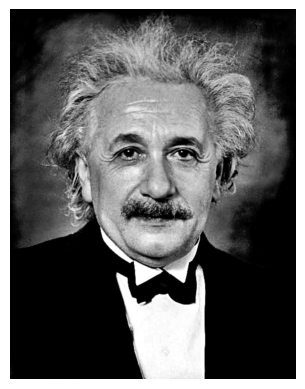

In [3]:
einstein = cv2.imread("einstein.jpg", 0)
plt.figure(), plt.imshow(einstein, cmap = "gray"), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 629.5, 816.5, -0.5))

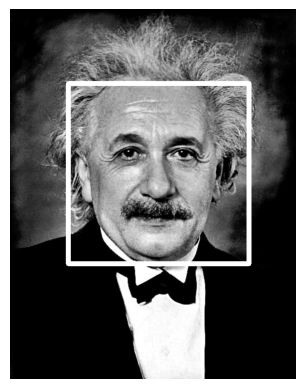

In [4]:
#simdi yuzu detect etmek icin cascadeclassifier i getiriyoruz.
#ve icinde indirdigimiz haarcascade i kullaniyoruz.


#burada yuz olup olmadigini anlamamiz icin cascade classifier cagirdik.
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

#simdi belirlenen yuzu rectangle icine alicaz,
face_rect = face_cascade.detectMultiScale(einstein)

for (x,y,w,h) in face_rect:
    cv2.rectangle(einstein, (x,y),(x+w, y+h),(255,255,255),10)
plt.figure(), plt.imshow(einstein, cmap = "gray"), plt.axis("off")

#burada once sirasiyla kuycuk bir karede yuz var mi diye bakiyor sonra yoksa 2 piksel yana kayip bakiyor oyle gidiyor.
#sonra bulamazsa kareyi buyultup bidaha bakiyor yuz var mi diye oyle de yuz bulana kadar resmi bitirmeye devam ediyor.

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1299.5, 901.5, -0.5))

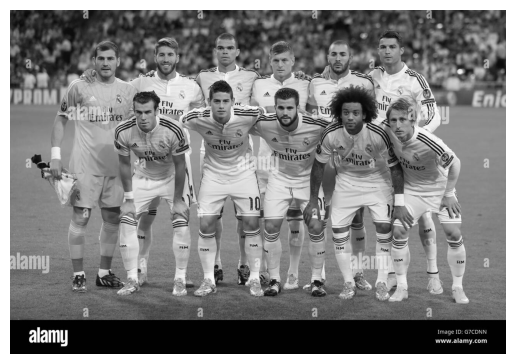

In [25]:
#simdi real madrid takiminin resmini ice aktaraflim

real = cv2.imread("madrid.jpg", 0)
plt.figure(), plt.imshow(real, cmap = "gray"), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1299.5, 901.5, -0.5))

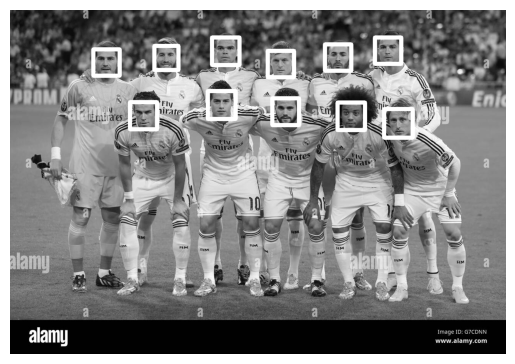

In [26]:
#burada minneighbors parametresi sunu yapiyor; burada aslinda tek bir seferde yuz oldugunu tanimlamiyor,
#birden fazla kere o noktada inceleme yapiyor ve birden fazla kere detect ediyor, eger 25 den azsa onu yuz olarak algilama
#diyoruz burada, kendi projelerinizde bazen bu sayi biraz daha az olabilir bazen daha fazla olabilir.
#bunun default hali 3 dur bende 3 cok performansli olmadigi icin 25 yaptim 25 de algoritmam gayet guzel calisiyor.

face_rect = face_cascade.detectMultiScale(real, minNeighbors = 25)


for (x,y,w,h) in face_rect:
    cv2.rectangle(real, (x,y),(x+w, y+h),(255,255,255),10)
plt.figure(), plt.imshow(real, cmap = "gray"), plt.axis("off")

In [27]:
#simdi video uzerinden yuz tespiti yapicaz.
# video
cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    
    if ret:
        
        face_rect = face_cascade.detectMultiScale(frame, minNeighbors = 7)
            
        for (x,y,w,h) in face_rect:
            cv2.rectangle(frame, (x,y),(x+w, y+h),(255,255,255),10)
        cv2.imshow("face detect", frame)
    
    if cv2.waitKey(1) & 0xFF == ord("q"): break

cap.release()
cv2.destroyAllWindows()